In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris, load_wine
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler, KBinsDiscretizer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from scipy import stats

sns.set(style='whitegrid')

<h1>Iris dataset preprocessing:</h1>


In [5]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

print("🔹 First 5 rows of the original dataset:")
display(df.head())

🔹 First 5 rows of the original dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
print("\n🔹 Missing Values in Dataset (original):")
print(df.isnull().sum())


🔹 Missing Values in Dataset (original):
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


In [7]:
df.iloc[0, 0] = np.nan
df.iloc[2, 2] = np.nan
print("\n🔹 After inserting missing values (for demo):")
print(df.isnull().sum())


🔹 After inserting missing values (for demo):
sepal length (cm)    1
sepal width (cm)     0
petal length (cm)    1
petal width (cm)     0
target               0
dtype: int64


In [8]:
imputer = SimpleImputer(strategy='mean')
df.iloc[:, :-1] = imputer.fit_transform(df.iloc[:, :-1])

print("\n🔹 After handling missing values:")
print(df.isnull().sum())


🔹 After handling missing values:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


In [9]:
le = LabelEncoder()
df['target'] = le.fit_transform(df['target'])

In [10]:
scaler = StandardScaler()
X = df.drop(columns='target')
y = df['target']

X_scaled = scaler.fit_transform(X)
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_scaled['target'] = y

print("\n🔹 First 5 rows after scaling:")
display(df_scaled.head())


🔹 First 5 rows after scaling:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,0.000000,1.019004,-1.358530e+00,-1.315444,0
1,-1.152203,-0.131979,-1.358530e+00,-1.315444,0
2,-1.395201,0.328414,-2.540785e-16,-1.315444,0
3,-1.516700,0.098217,-1.301317e+00,-1.315444,0
4,-1.030704,1.249201,-1.358530e+00,-1.315444,0


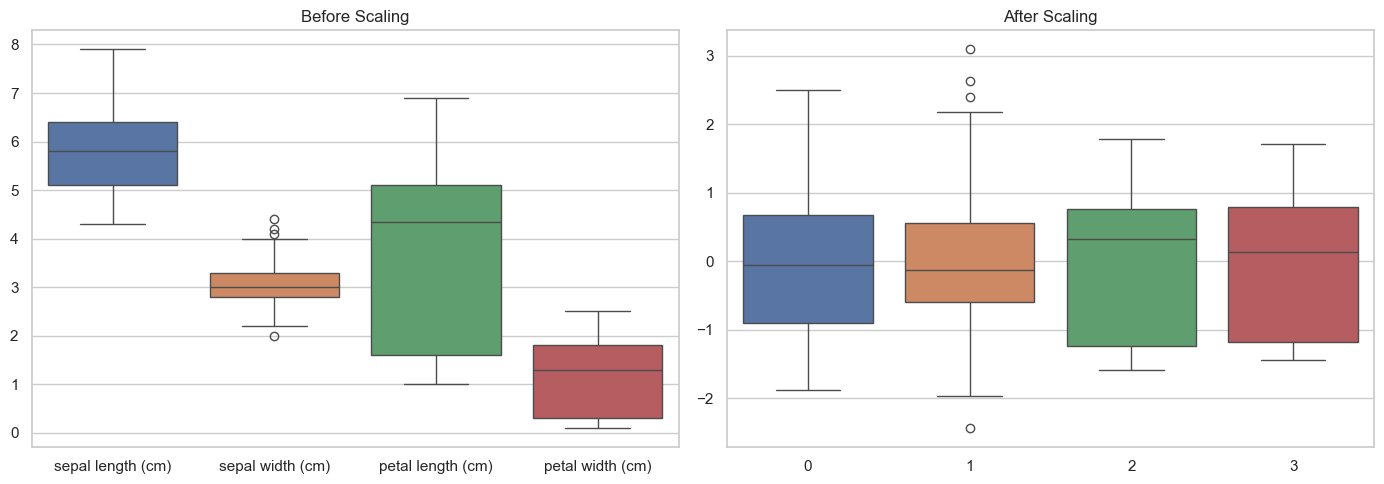

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.boxplot(data=X, ax=axes[0])
axes[0].set_title("Before Scaling")

sns.boxplot(data=X_scaled, ax=axes[1])
axes[1].set_title("After Scaling")

plt.tight_layout()
plt.show()

In [14]:
selector = SelectKBest(score_func=f_classif, k=2)
X_selected = selector.fit_transform(X_scaled, y)
selected_cols = X.columns[selector.get_support()]

print("\n🔹 Top 2 selected features:", list(selected_cols))
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

print("\n🔹 Train/Test Split Shapes:")
print("X_train:", X_train.shape, "| X_test:", X_test.shape)


🔹 Top 2 selected features: ['petal length (cm)', 'petal width (cm)']

🔹 Train/Test Split Shapes:
X_train: (105, 2) | X_test: (45, 2)


In [15]:
binner = KBinsDiscretizer(n_bins=3, encode="ordinal", strategy="quantile")
X_binned = binner.fit_transform(X_scaled)
X_binned_df = pd.DataFrame(X_binned, columns=X.columns)
X_binned_df['target'] = y

print("\n🔹 Discretized Feature Sample:")
display(X_binned_df.head())


🔹 Discretized Feature Sample:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,1.0,2.0,0.0,0.0,0
1,0.0,1.0,0.0,0.0,0
2,0.0,2.0,1.0,0.0,0
3,0.0,1.0,0.0,0.0,0
4,0.0,2.0,0.0,0.0,0


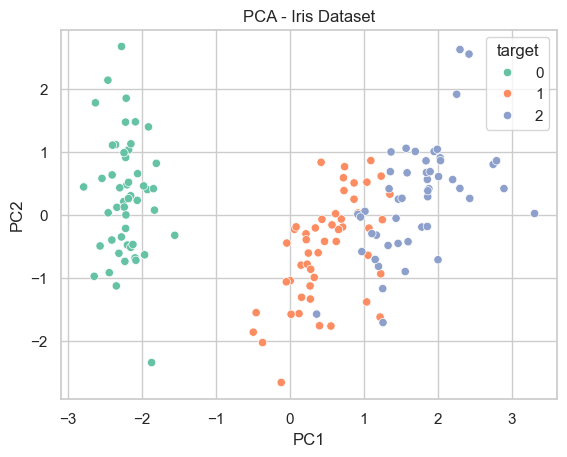

In [16]:
selector_pca = SelectKBest(score_func=f_classif, k=4)
X_pca_input = selector_pca.fit_transform(X_scaled, y)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_pca_input)

pca_df = pd.DataFrame(pca_components, columns=["PC1", "PC2"])
pca_df["target"] = y

sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="target", palette="Set2")
plt.title("PCA - Iris Dataset")
plt.show()

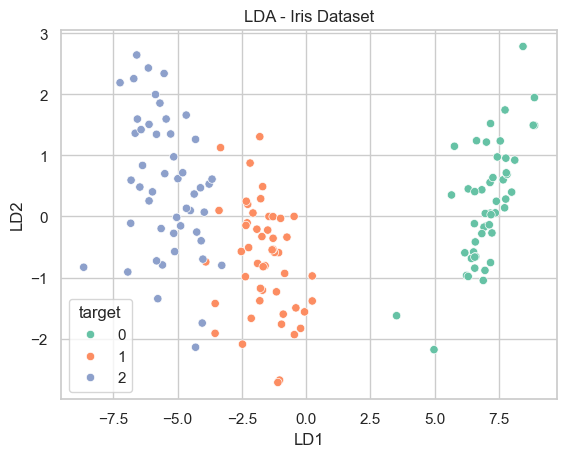

In [17]:
lda = LDA(n_components=2)
lda_components = lda.fit_transform(X_scaled, y)

lda_df = pd.DataFrame(lda_components, columns=["LD1", "LD2"])
lda_df["target"] = y

sns.scatterplot(data=lda_df, x="LD1", y="LD2", hue="target", palette="Set2")
plt.title("LDA - Iris Dataset")
plt.show()

In [18]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("\n🔹 Classification Report:")
print(classification_report(y_test, y_pred))


🔹 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



<h1>Wine dataset preprocessing</h1>

In [24]:
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target

print("🔹 First 5 rows of the original Wine dataset:")
display(df.head())

🔹 First 5 rows of the original Wine dataset:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [25]:
print("\n🔹 Missing Values in Dataset (original):")
print(df.isnull().sum())


🔹 Missing Values in Dataset (original):
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64


In [26]:
df.iloc[1, 1] = np.nan
df.iloc[4, 5] = np.nan
print("\n🔹 After inserting missing values (for demo):")
print(df.isnull().sum())


🔹 After inserting missing values (for demo):
alcohol                         0
malic_acid                      1
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   1
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64


In [27]:
imputer = SimpleImputer(strategy='mean')
df.iloc[:, :-1] = imputer.fit_transform(df.iloc[:, :-1])

print("\n🔹 After handling missing values:")
print(df.isnull().sum())


🔹 After handling missing values:
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64


In [28]:
le = LabelEncoder()
df['target'] = le.fit_transform(df['target'])

In [29]:
X = df.drop(columns='target')
y = df['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_scaled['target'] = y

print("\n🔹 First 5 rows after scaling:")
display(df_scaled.head())


🔹 First 5 rows after scaling:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,1.518613,-0.565470,0.232053,-1.169593,1.913905,0.815076,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,0
1,0.246290,0.000000,-0.827996,-2.490847,0.018145,0.574281,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,0
2,0.196879,0.018423,1.109334,-0.268738,0.088358,0.815076,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,0
3,1.691550,-0.349879,0.487926,-0.809251,0.930918,2.500644,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,0
4,0.295700,0.225031,1.840403,0.451946,1.281985,0.000000,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,0


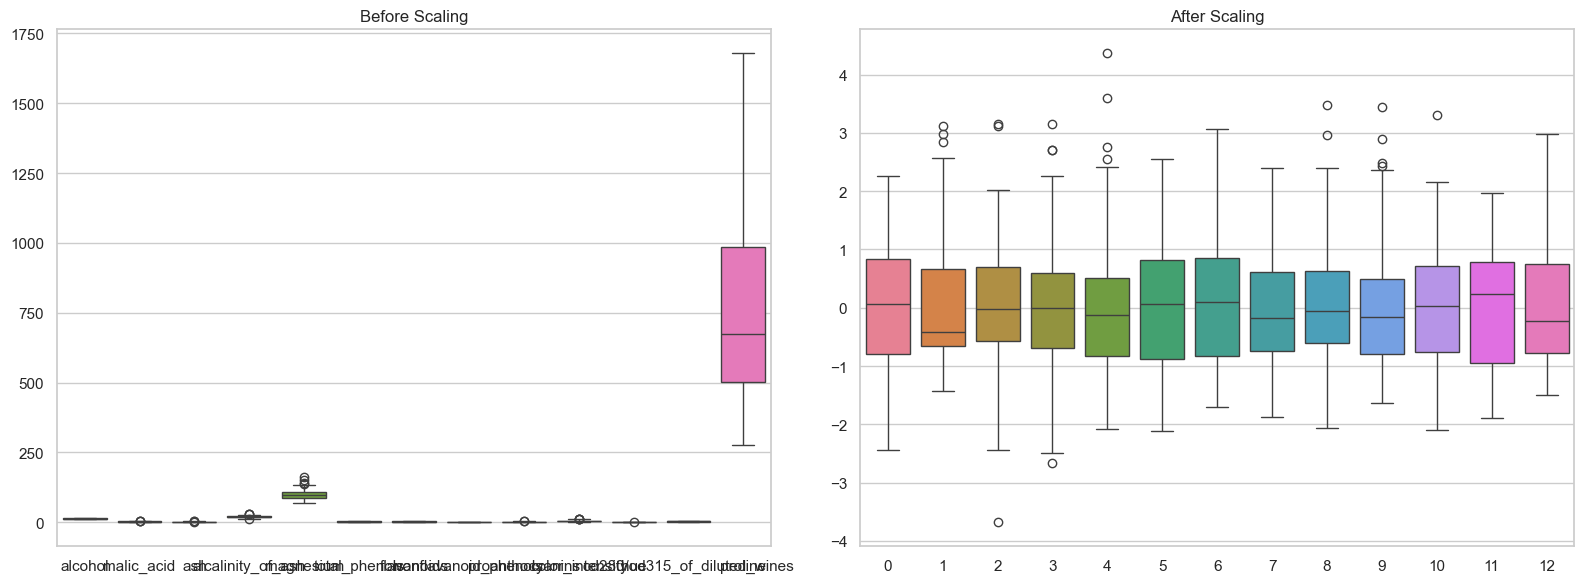

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.boxplot(data=X, ax=axes[0])
axes[0].set_title("Before Scaling")

sns.boxplot(data=X_scaled, ax=axes[1])
axes[1].set_title("After Scaling")

plt.tight_layout()
plt.show()

In [31]:
selector = SelectKBest(score_func=f_classif, k=4)
X_selected = selector.fit_transform(X_scaled, y)
selected_cols = X.columns[selector.get_support()]
print("\n🔹 Top 4 selected features:", list(selected_cols))

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)
print("\n🔹 Train/Test Split Shapes:")
print("X_train:", X_train.shape, "| X_test:", X_test.shape)


🔹 Top 4 selected features: ['alcohol', 'flavanoids', 'od280/od315_of_diluted_wines', 'proline']

🔹 Train/Test Split Shapes:
X_train: (124, 4) | X_test: (54, 4)


In [32]:
binner = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
X_binned = binner.fit_transform(X_scaled)
X_binned_df = pd.DataFrame(X_binned, columns=X.columns)
X_binned_df['target'] = y

print("\n🔹 Discretized Feature Sample:")
display(X_binned_df.head())


🔹 Discretized Feature Sample:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,2.0,1.0,1.0,0.0,2.0,2.0,2.0,0.0,2.0,1.0,1.0,2.0,2.0,0
1,1.0,1.0,0.0,0.0,1.0,2.0,2.0,0.0,0.0,1.0,1.0,2.0,2.0,0
2,1.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,0
3,2.0,1.0,2.0,0.0,2.0,2.0,2.0,0.0,2.0,2.0,0.0,2.0,2.0,0
4,1.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0


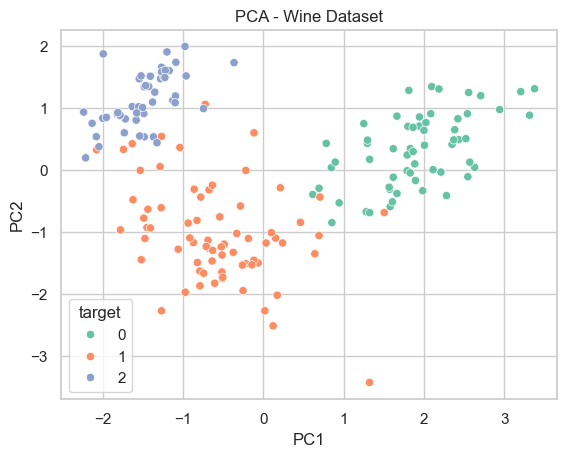

In [33]:
X_pca_input = selector.fit_transform(X_scaled, y)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_pca_input)

pca_df = pd.DataFrame(pca_components, columns=["PC1", "PC2"])
pca_df["target"] = y

sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="target", palette="Set2")
plt.title("PCA - Wine Dataset")
plt.show()

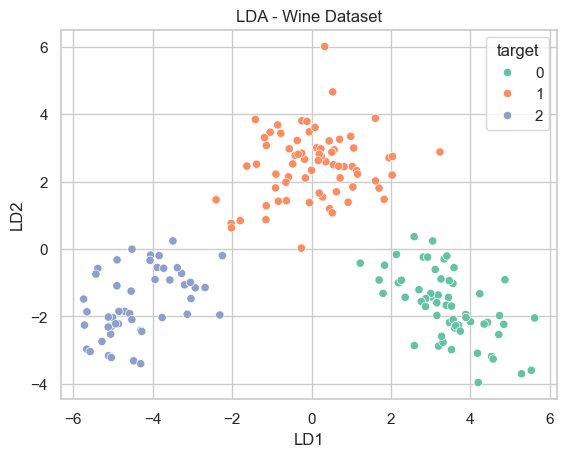

In [34]:
lda = LDA(n_components=2)
lda_components = lda.fit_transform(X_scaled, y)

lda_df = pd.DataFrame(lda_components, columns=["LD1", "LD2"])
lda_df["target"] = y

sns.scatterplot(data=lda_df, x="LD1", y="LD2", hue="target", palette="Set2")
plt.title("LDA - Wine Dataset")
plt.show()

In [36]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("\n🔹 Classification Report:")
print(classification_report(y_test, y_pred))


🔹 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.90      0.95        21
           2       0.88      1.00      0.93        14

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54

